In [1]:
# %load mcnn_with_coco.py
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import pycocotools.mask as mask
import numpy

# Root directory of the project
ROOT_DIR = os.path.abspath(".\\")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples\\coco"))  # To find local version
import coco #왜 빨간줄 뜨는지 모르겠음. 실제로 import는 되는듯

# Import coco API mask.py
import pycocotools.mask
print(sys.path)

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
#config.display() 설정 출력

# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

# Load COCO dataset
dataset = coco.CocoDataset()
dataset.load_coco("C:/Program Files/Python36/Lib/site-packages/pycocotools/coco", "train")
dataset.prepare()







c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['', 'c:\\program files\\python36\\python36.zip', 'c:\\program files\\python36\\DLLs', 'c:\\program files\\python36\\lib', 'c:\\program files\\python36', 'c:\\program files\\python36\\lib\\site-packages', 'c:\\program files\\python36\\lib\\site-packages\\mask_rcnn-2.1-py3.6.egg', 'c:\\program files\\python36\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\you88\\.ipython', 'C:\\Users\\you88\\PycharmProjects\\[Github] Mask-RCNN', 'C:\\Users\\you88\\PycharmProjects', 'C:\\Users\\you88\\PycharmProjects\\[Github] Mask-RCNN\\samples\\coco', 'C:\\Users\\you88']
loading annotations into memory...
Done (t=20.12s)
creating index...
index created!


In [30]:
# Print class names
print(dataset.class_names)

    

['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
person


In [214]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

In [215]:
# Run detection
results = model.detect([image], verbose=1)



Processing 1 images
image                    shape: (720, 960, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


-----------------visualization------------------


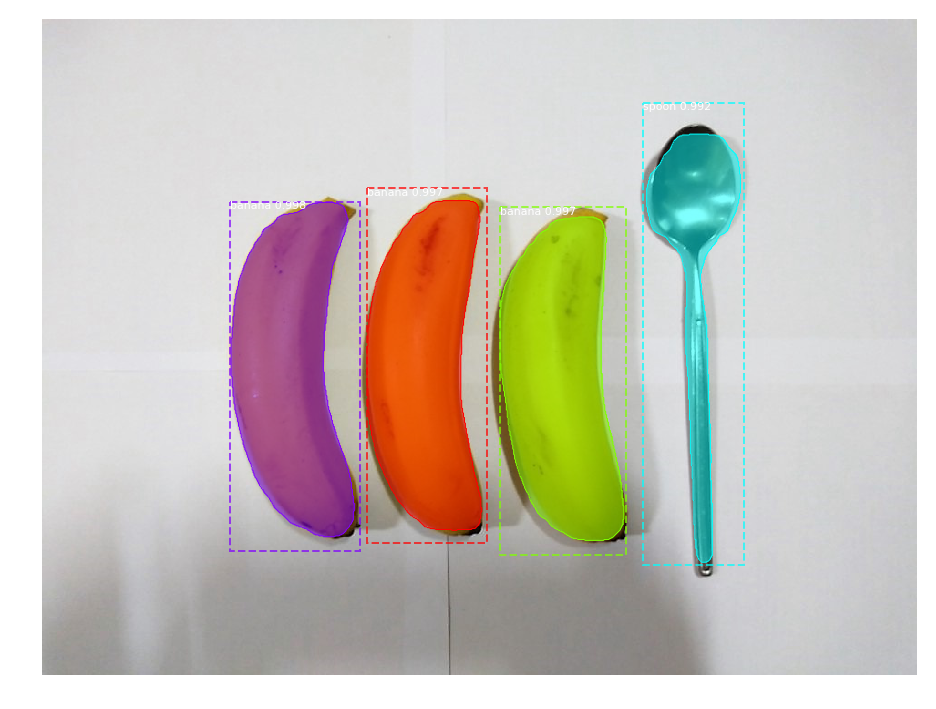

'\nresults.append({\n                "rois": final_rois,\n                "class_ids": final_class_ids,\n                "scores": final_scores,\n                "masks": final_masks,\n            })\n'

In [216]:
print("-----------------visualization------------------")
# Visualize results
r = results[0]
"""
encoded_mask = mask.encode(numpy.asfortranarray(r['masks']))
print(mask.area(encoded_mask))
"""

visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            dataset.class_names, r['scores'])

"""
results.append({
                "rois": final_rois,
                "class_ids": final_class_ids,
                "scores": final_scores,
                "masks": final_masks,
            })
"""

In [217]:
class Fruit:
    def __init__(self):
        #바나나,사과,오렌지
        self.name=['banana','apple','orange']
        self.class_ids = [47,48,50] 
        self.mean_mass = [146.38, 263.82, 216.99]
        # 평균 fruit 크기: 평균 수저 크기 = 1:mean_ratio
        self.mean_ratio = [2.456, 2.8006, 1.96] 
        self.num = [0,0,0]
        self.mass=[0,0,0]
        self.spoon_pixel = 0
        self.kcal = [0,0,0]
        self.kcal_per_g = [0.89, 0.52, 0,47]
        
    def is_fruit(self,class_id):
        if class_id in self.class_ids:
            return "True", self.class_ids.index(class_id)
        return "False" , -1
    
    def calculate_mass_kcal(self,fruit_pixel,fruit_index):
        mass = 0
        ratio = fruit_pixel / self.spoon_pixel
        relative_size = ratio / self.mean_ratio[fruit_index]
        print("평균 질량에 비해",pow(relative_size,3/2),"배 ")
        mass += self.mean_mass[fruit_index] * pow(relative_size ,(3/2))
        self.mass[fruit_index] += mass
        self.kcal[fruit_index] += mass * self.kcal_per_g[fruit_index]
        print(self.kcal[fruit_index])
        
    def print_result(self):
        total_calory = 0
        for index in range(len(self.name)):
            if self.num[index] == 0: #detect 되지 않았으면 pass
                continue
            print("-------------------------------------------------")
            print("과일이름: ",self.name[index])
            print("개수: ", self.num[index])
            print("mass 합: ", self.mass[index])
            print("칼로리 합: ", self.kcal[index])
            total_calory += self.kcal[index]
            
        print("---------------------------------------------------")
        print("총 칼로리: ", total_calory )



In [218]:
height = image.shape[0]
width = image.shape[1]
                
fruit = Fruit()
#미리 spoon mask 크기 구하기
spoon_index = numpy.where(r['class_ids'] == 45)
for i in range(height):
    for j in range(width):
        if r['masks'][i][j][spoon_index]:
            fruit.spoon_pixel += 1

print("전체 그림 크기: ", height*width)
print("spoon_pixel: ", fruit.spoon_pixel)
#class별 mask 크기 구하기
for k in range(len(r['class_ids'])):
    pixel_cnt = 0
    for i in range(height):
        for j in range(width):
            if r['masks'][i][j][k]: #해당 클래스에 대한 mask pixel 존재할 경우
                pixel_cnt += 1
                
    is_fruit, fruit_index = fruit.is_fruit(r['class_ids'][k])
    if is_fruit == "True":
        fruit.num[fruit_index] += 1 #해당 과일 mask 개수
        fruit.calculate_mass_kcal(pixel_cnt,fruit_index) 
        
    print("class",dataset.class_names[r['class_ids'][k]] ,"의 mask 크기: ",pixel_cnt)

#결과 출력
fruit.print_result()    


전체 그림 크기:  691200
spoon_pixel:  17449
평균 질량에 비해 0.7244262465777134 배 
94.37694743690066
class banana 의 mask 크기:  34567
평균 질량에 비해 0.7570450780119224 배 
193.00341751915352
class banana 의 mask 크기:  35597
평균 질량에 비해 0.7207199962383548 배 
286.89752133309315
class banana 의 mask 크기:  34449
class spoon 의 mask 크기:  17449
-------------------------------------------------
과일이름:  banana
개수:  3
mass 합:  322.35676554280127
칼로리 합:  286.89752133309315
---------------------------------------------------
총 칼로리:  286.89752133309315
